Max area: 4735222687
1784 1650
98378 98435
len(data)=496
intersect_x=[16173.0, 85056.0]


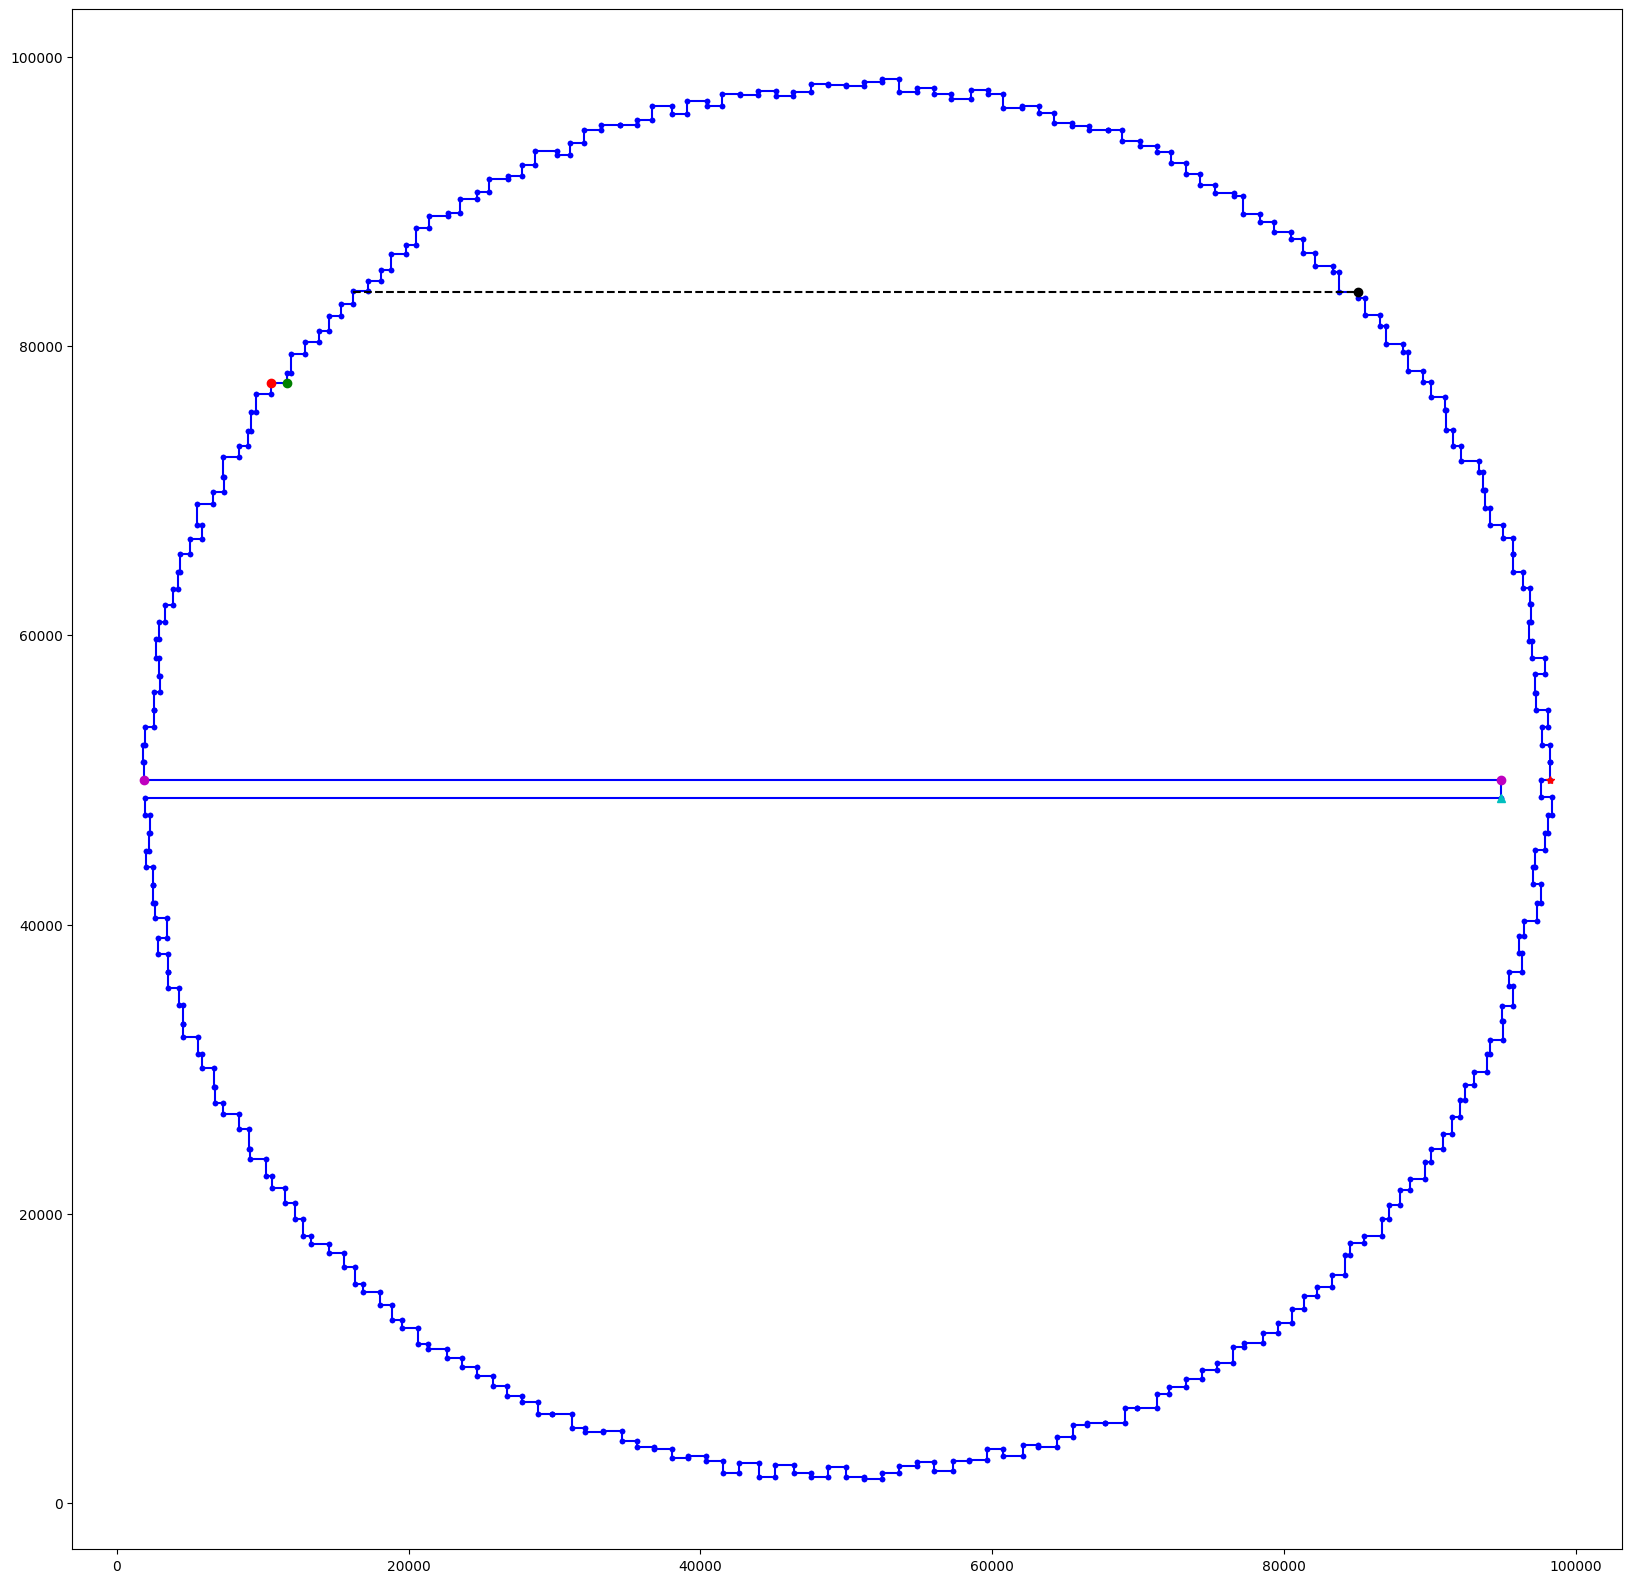

data[0]=(98276, 50002)
data[247]=(1871, 50002)
data[249]=(94879, 48778)


In [32]:

import os
import  matplotlib
import matplotlib.pyplot as plt


def parse_input(fname: str) -> list[tuple[int, int]]:
    with open(fname, "r") as f:
        lines = [x.strip() for x in f.readlines()]
    data = []
    for line in lines:
        data.append(tuple(int(x) for x in line.split(",")))
    return data

def solve_day_09_part1(fname: str):
    data = parse_input(fname)
    max_area = 0
    for x1, y1 in data:
        for x2, y2 in data:
            area = (abs(x1 - x2) + 1) * (abs(y1 - y2) + 1)
            max_area = max(area, max_area)
    return max_area

def get_intersections(polygon_points, y_line):
    intersections = []
    n = len(polygon_points)
    
    for i in range(n):
        # Get the current edge P1 -> P2
        p1 = polygon_points[i]
        p2 = polygon_points[(i + 1) % n] # Wrap around to the start
        
        # Check if the edge is horizontal (parallel to line)
        if p1[1] == p2[1]:
            continue # Usually ignored in scan-line logic
            
        # Check if y_line bounds are strictly within the edge's Y range
        # We use strict comparison (<) for one end to handle vertices
        if min(p1[1], p2[1]) < y_line <= max(p1[1], p2[1]):
            
            # Calculate intersection X
            # (x2 - x1) * (y_line - y1) / (y2 - y1) + x1
            x_int = p1[0] + (p2[0] - p1[0]) * (y_line - p1[1]) / (p2[1] - p1[1])
            intersections.append(x_int)
            
    # Sort X intersections from left to right (standard practice)
    return sorted(intersections)


def solve_day_09_part2(fname: str):
    data = parse_input(fname)
   
    min_x, min_y = min(x for x, y in data), min(y for x, y in data)
    print(min_x, min_y)
    max_x, max_y = max(x for x, y in data), max(y for x, y in data)
    print(max_x, max_y)

    print(f"{len(data)=}")
    import matplotlib.pyplot as plt
    plt.figure(figsize=(20,20))
    for p1, p2 in zip(data, data[1:] + [data[0]]):
        x_values = [p1[0], p2[0]]
        y_values = [p1[1], p2[1]]
        plt.plot(x_values, y_values, 'b.-')

    plt.plot(data[0][0], data[0][1], "r*")
    plt.plot(data[200][0], data[200][1], "ro")
    plt.plot(data[199][0], data[199][1], "go")
    plt.plot(data[247][0], data[247][1], "mo")

    plt.plot(data[248][0], data[248][1], "mo")
    plt.plot(data[249][0], data[249][1], "c^")
    
    intersect_x = get_intersections(data, data[61][1])
    print(f"{intersect_x=}")
    plt.plot(intersect_x, [data[61][1]] * len(intersect_x), "k--") 
    plt.plot(intersect_x[1], data[61][1], "ko")  # Second intersection
    plt.plot()
    plt.show()  

    print(f"{data[0]=}")
    print(f"{data[247]=}")
    print(f"{data[249]=}")

result = solve_day_09_part1(os.path.expanduser("~/day_09.txt"))
print(f"Max area: {result}")
solve_day_09_part2(os.path.expanduser("~/day_09.txt"))

In [ ]:
2325248304.0
2409562320.0